## 라이브러리 추가

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_show(image):
    cv2.imshow("show", image)
    cv2.waitKey(0)

In [2]:
# Creating face_cascade and eye_cascade objects
face_cascade = cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./data/haarcascade_eye.xml")

## 얼굴 인식 

In [3]:
# Loading the image ..
img = cv2.imread("./img/face.png")

In [4]:
# Converting the image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

face_cascade.detectMultiScale의 4는 좌표의 개수임으로 4로 설정해야 x y w h를 알 수 있다

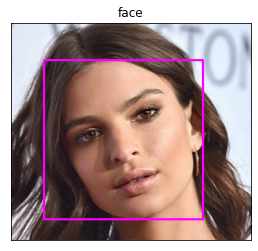

In [8]:
# Defining and drawing the rectangles around the face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)


plt.subplot(1,1,1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      #색상 변환
plt.imshow(img_rgb)
plt.title("face")
plt.xticks([])
plt.yticks([])
plt.show()

cv2.rectangle(이미지, 시작점, 대각선 끝점, 색상값, 선의 굵기)

## 눈 인식

먼저 사각형 안에 위치할 두개의 관심 영역을 만들어야 한다.  
눈을 감지할 회색조 이미지 첫 번째 영역이 필요하고 두 번째 영역은 사각형을 그릴 컬러 이미지가 필요하다.

In [12]:
roi_gray = gray[y:(y+h), x:(x+w)]
roi_color = img[y:(y+h), x:(x+w)]

eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)

index = 0

In [13]:
# Creating for loop in order to divide one eye from another
for (ex, ey, ew, eh) in eyes:
    if index == 0:
        eye_1 = (ex, ey, ew, eh)
    elif index == 1:
        eye_2 = (ex, ey, ew, eh)

    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
    index = index + 1

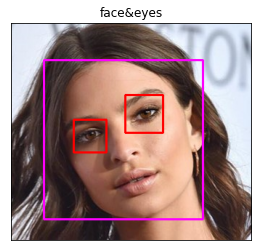

In [14]:
plt.subplot(1,1,1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      #색상 변환
plt.imshow(img_rgb)
plt.title("face&eyes")
plt.xticks([])
plt.yticks([])
plt.show()